## Computational Homework 7: The double descent phenomenon

In this assignment we will investigate an interesting and unexpected phenomenon that can occur when we fit non-linear functions using least squares called _double descent_. To do this, we will consider fitting a polynomial model to some simple synthetic data which is generated as follows:

$$
y_i = f_\star(x_i) + \varepsilon_i
$$

where $f_\star(x) = x^3 - x$, $x\in [-1,1]$, and $\varepsilon \sim N(0,\sigma^2)$ (here we use $\sigma^2 = 0.01$, but feel free to try this with other values of $\sigma$ as well). The following cell generates this dataset and plots it.

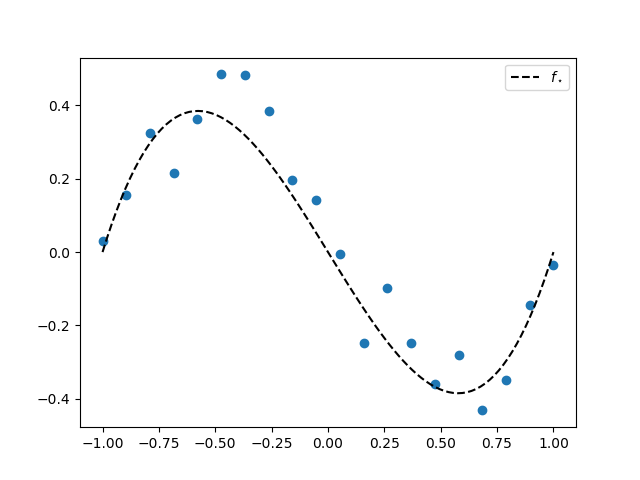

In [1]:
import numpy as np
import matplotlib.pyplot as plt

f_star = lambda x: x**3 - x

n = 20
sigma = 0.1
x = np.linspace(-1,1,n)
y = f_star(x) + sigma*np.random.normal(size=n)

x_test = np.linspace(-1,1,100)

plt.plot(x_test, f_star(x_test), color='black', linestyle='--', label="$f_\star$")
plt.scatter(x, y)
plt.legend()
plt.show()


For this assignment, we will experiment with fitting models to this data using feature maps of the form 

$$
\phi_p(x) = (P_0(x), P_1(x),\dots, P_{p}(x))
$$

where $P_j$ is the $j^{th}$ [Legendre polynomial](https://en.wikipedia.org/wiki/Legendre_polynomials). Legendre polynomials are a lot like normal polynomials, except they are designed to be _orthogonal_ in the sense that

$$
\int_{-1}^1 P_j(x)P_k(x)dx = 0
$$

for $j\neq k$. This property isn't particularly important for us, though Legendre polynomials are popular feature maps to use in practice, and so they are worth knowing of. Given an integer $p\geq 0$, we can use this feature map to define an $n\times (p+1)$ feature matrix

$$
X_p = \begin{bmatrix} P_0(x_1) & P_1(x_1) & \cdots & P_{p}(x_1)\\ \vdots & \vdots & \vdots &\vdots \\ P_0(x_n) & P_1(x_n) & \cdots & P_{p}(x_n)\end{bmatrix} \in \mathbb{R}^{n\times (p+1)}.
$$

This matrix can be constructed using the function `np.polynomial.legendre.legvander`, as we demonstrate in the following cell.

In [2]:
legendre_basis = np.polynomial.legendre.legvander

p = 4
u = np.array([1,2,3])
legendre_basis(u, p) # 3 x 5 matrix of features

array([[  1.   ,   1.   ,   1.   ,   1.   ,   1.   ],
       [  1.   ,   2.   ,   5.5  ,  17.   ,  55.375],
       [  1.   ,   3.   ,  13.   ,  63.   , 321.   ]])

Given coefficients $\beta = (\beta_0,\dots,\beta_{p-1}, \beta_p)$, we can use these polynomials to fit functions of the form 

$$
f(x) = \beta\cdot \phi(x) = \beta_0P_0(x) + \beta_1P_1(x) + \cdots \beta_{p-1}P_{p-1}(x) + \beta_p P_p(x).
$$

For example, we can plot the function $f(x) = P_0(x) - P_1(x) + P_2(x)$ using the following.

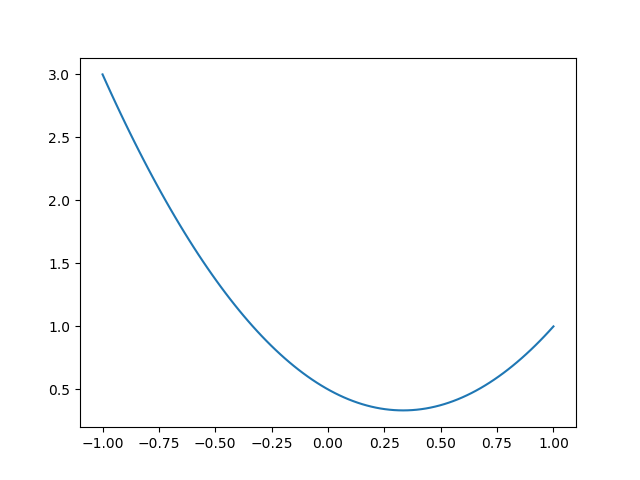

In [3]:
coef = np.array([1,-1, 1])
X = legendre_basis(x_test, 2)
plt.plot(x_test, np.dot(X,coef))
plt.show()

**Problem 1.** Write a function `fit_mp` which, for a feature matrix $X$, computes the Moore-Penrose fit $\hat{\beta}_{MP} = X^{\dagger}y$ where $X^\dagger$ is the pseudo-inverse of $X$. (Note: the function `np.linalg.pinv` should be used here). Use this to compute the least squares fits for $p = [1,2,\dots,12]$, and plot the MSE on the test set (i.e. $\frac{1}{n_{test}}\sum_{x_{test}} (f_\star(x_{test}) - \hat{f}(x_{test}))^2$) as a function of $p$. Describe in words what this plot looks like. If you had to use this plot to pick a value of $p$, which would you choose?

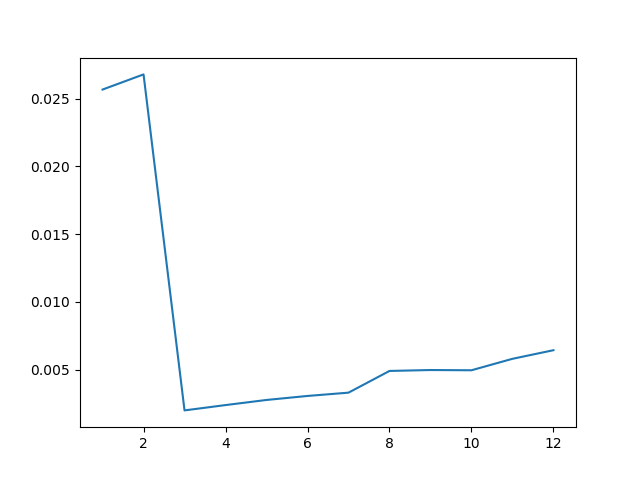

This plot shows MSE remains constant from p = 1 to p = 2, and then drops for p = 3 to p = 12, fluctuating between 0 and 0.006.
I would choose p = 1 + index of (array([2], dtype=int32),) , where MSE reaches its minimum.


In [4]:
def fit_mp(X,y):
    beta_hat_mp = np.dot(np.linalg.pinv(X), y)
    return beta_hat_mp

MSEs = []
ps = []
for p in range(1, 13):
    X_train = legendre_basis(x, p)
    X_test = legendre_basis(x_test, p)
    beta_hat_mp = fit_mp(X_train, y)
    ls_fit = np.dot(X_test, beta_hat_mp)
    MSE = 1/len(x_test) * sum((f_star(x_test) - ls_fit) ** 2)
    MSEs.append(MSE)
    ps.append(p)

plt.plot(np.linspace(1, 12, 12), MSEs)
plt.show()

print("This plot shows MSE remains constant from p = 1 to p = 2, and then drops for p = 3 to p = 12, fluctuating between 0 and 0.006.")
print("I would choose p = 1 + index of", np.where(MSEs == min(MSEs)), ", where MSE reaches its minimum.")


**Problem 2** Next, perform the same steps as problem 1, only for $p = 10,11,\dots,29,30$. Now what does the plot of MSE vs $p$ look like? What value of $p$ is best? Does this curve have a maximum? If so, at what value? How does this relate to the number of samples ($n=20$, in this case)? Next, plot the fitted functions $\hat{f}$ for $p=3,20,30$. Describe the behavior of these functions in words, and relate their behavior to their MSE's.

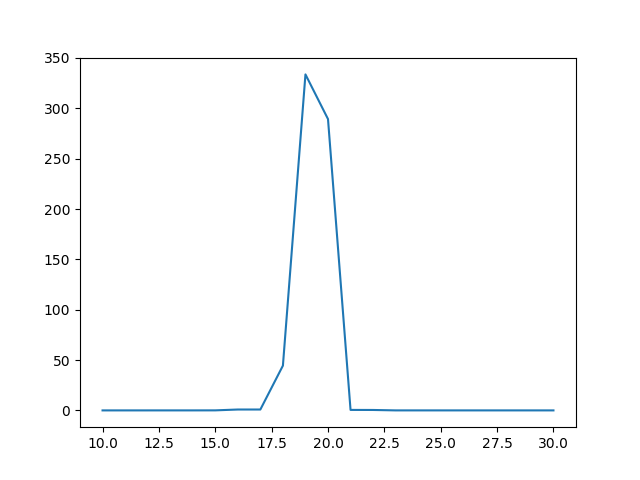

This plot shows MSE remains around 0 and has a peak between p = 18 and p = 21.
p = 1 + index of (array([0], dtype=int32),) is best.
This curve does have a maximum at  333.6969418573182 .
This relates to the number of samples by that the larger the sample size is, the larger MSE tends to be.
p = 3
MSE = 0.0019919635024896794


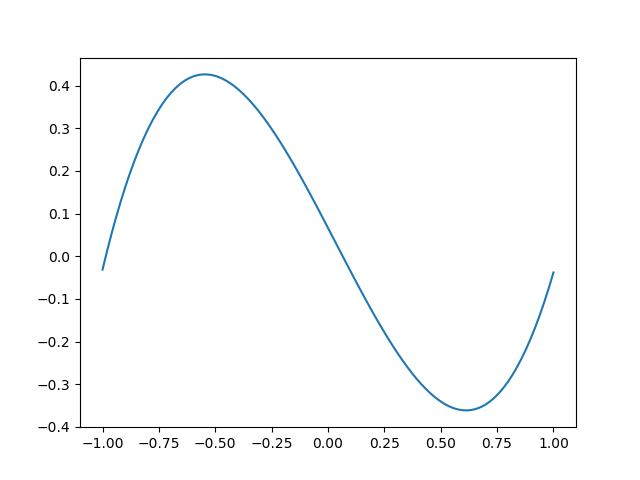

p = 20
MSE = 289.330822658601


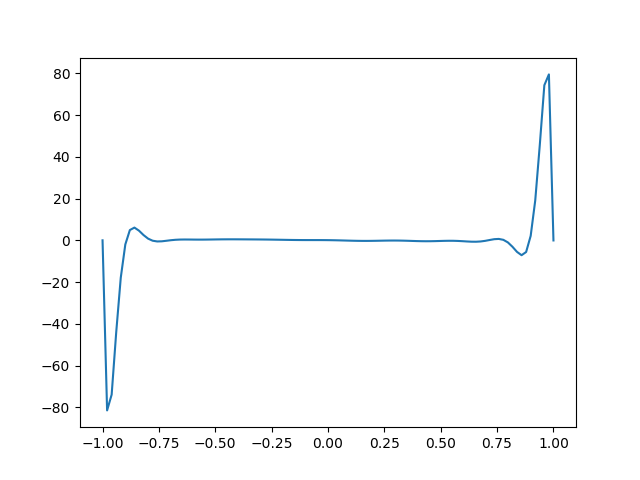

p = 30
MSE = 0.008079007687658232


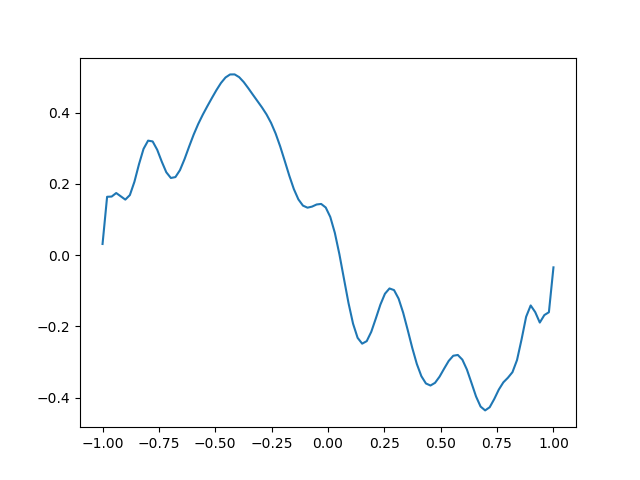

Fitted values are less smooth but flucturate more as p increases. A general trend is that the values show a 3rd degree polynomial curve. For p = 20, the plot matches the true function the least, and the MSE is way larger than the other two. For p = 30, the plot overfits.


In [5]:
MSEs = []
ps = []
for p in range(10, 31):
    X_train = legendre_basis(x, p)
    X_test = legendre_basis(x_test, p)
    beta_hat_mp = fit_mp(X_train, y)
    ls_fit = np.dot(X_test, beta_hat_mp)
    MSE = 1/len(x_test) * sum((f_star(x_test) - ls_fit) ** 2)
    MSEs.append(MSE)
    ps.append(p)

plt.plot(np.linspace(10, 30, 21), MSEs)
plt.show()

print("This plot shows MSE remains around 0 and has a peak between p = 18 and p = 21.")
print("p = 1 + index of", np.where(MSEs == min(MSEs)), "is best.")
print("This curve does have a maximum at ", max(MSEs), ".")
print("This relates to the number of samples by that the larger the sample size is, the larger MSE tends to be.")


for p in (3, 20, 30):
    X_train = legendre_basis(x, p)
    X_test = legendre_basis(x_test, p)
    beta_hat_mp = fit_mp(X_train, y)
    ls_fit = np.dot(X_test, beta_hat_mp)
    MSE = 1/len(x_test) * sum((f_star(x_test) - ls_fit) ** 2)
    print("p =", p)
    print("MSE =", MSE)
    plt.plot(x_test, ls_fit)
    plt.show()

print("Fitted values are less smooth but flucturate more as p increases. A general trend is that the values show a 3rd degree polynomial curve. For p = 20, the plot matches the true function the least, and the MSE is way larger than the other two. For p = 30, the plot overfits.")
      
      
      

**Problem 3.** In this problem, we show that phenomenon observed in Problem 2 goes away when we add Ridge regularization. To see this, for each value of $p = 1,2,\dots,29,30$, compute the Ridge estimator $\hat{\beta}_{RR}(\lambda) = (X_p^\top X_p + \lambda I)^{-1}X_p^\top y$ for $\lambda = 10$, and compute its MSE on the test examples `x_test`. What does the MSE plot look like now as a function of $p$? Describe its behavior in words.

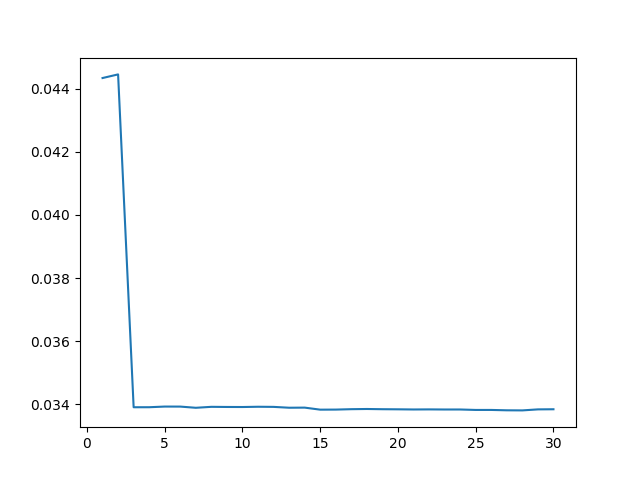

The MSE plot now shows MSE remains constant from p = 1 to p = 2, and then drops to remain around 0 for p = 3 to p = 12.


In [6]:
def fit_RR(X, y, lamb):
    return np.dot(np.linalg.inv(X.T@X + lamb*np.eye(X.shape[1])), np.dot(X.T, y))

MSEs = []
ps = []
for p in range(1, 31):
    X_train = legendre_basis(x, p)
    X_test = legendre_basis(x_test, p)
    rr_beta = fit_RR(X_train, y, 10)
    rr_fit = np.dot(X_test, rr_beta)
    MSE = 1/len(x_test) * sum((f_star(x_test) - rr_fit) ** 2)
    MSEs.append(MSE)
    ps.append(p)

plt.plot(np.linspace(1, 30, 30), MSEs)
plt.show()

print("The MSE plot now shows MSE remains constant from p = 1 to p = 2, and then drops to remain around 0 for p = 3 to p = 12.")
